In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month
data['dayofyear'] = data['fecha'].dt.dayofyear
data['semana'] = data['fecha'].dt.week

sns.set(style="white", context="talk")

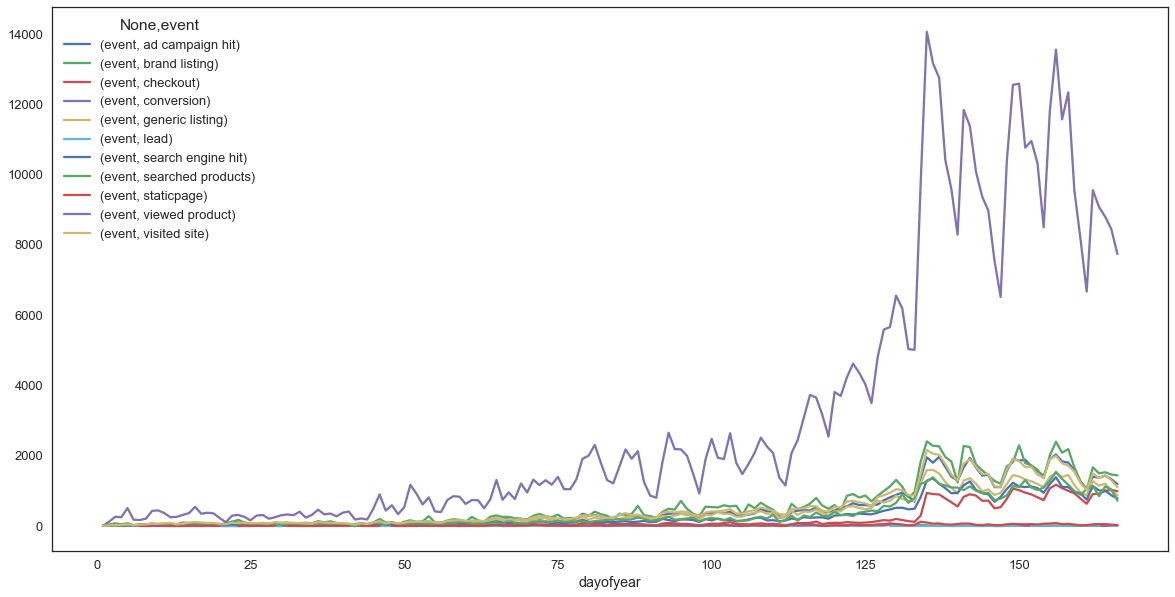

In [56]:
camp = data.groupby('dayofyear').event.value_counts()
camp.to_frame().unstack('event').plot(kind = 'line', figsize = (20, 10))

In [115]:
conv = data[data['event'] == 'conversion']
conv['marca'] = conv.model.apply(lambda x: str(x).split(" ")[0])
conv.marca.value_counts()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Samsung     641
iPhone      323
Motorola    149
Sony         23
LG           20
Lenovo       14
Asus          2
Name: marca, dtype: int64

Text(0.5,1,'Ventas por marca por semana del año')

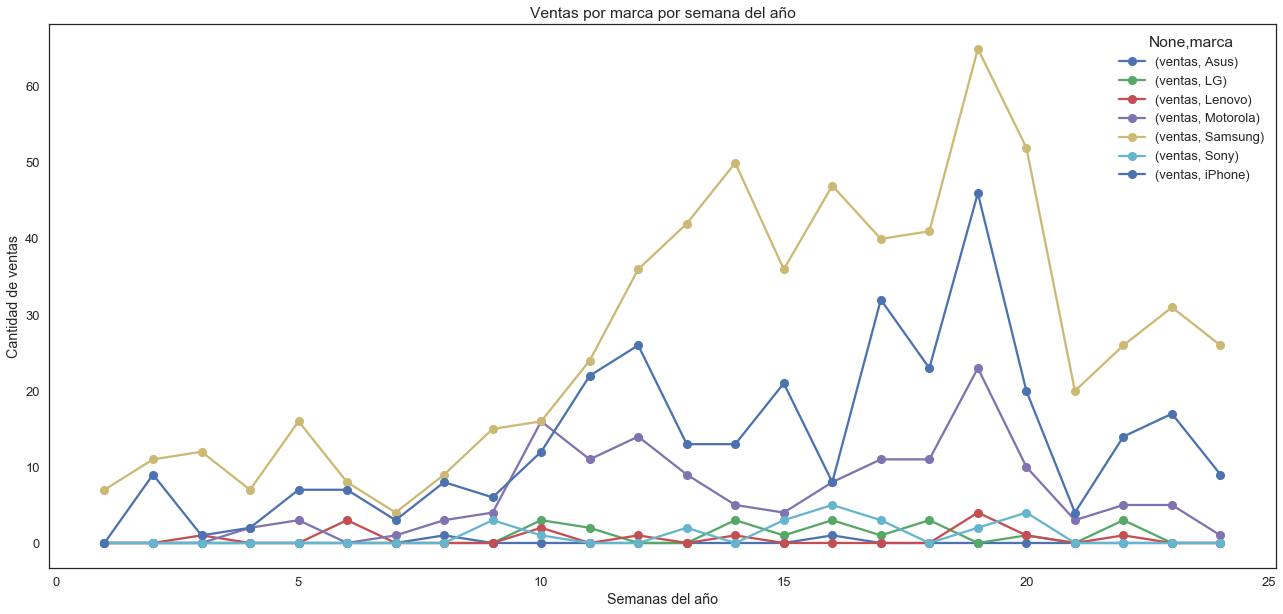

In [116]:
conv = conv.groupby('semana').marca.value_counts().to_frame('ventas')
graf = conv.unstack('marca').fillna(0).plot(kind = 'line', figsize = (22, 10), style = '-o')
graf.set_xlabel('Semanas del año')
graf.set_ylabel('Cantidad de ventas')
graf.set_title('Ventas por marca por semana del año')

In [124]:
view = data[data['event'] == 'viewed product']
view['marca'] = conv.model.apply(lambda x: str(x).split(" ")[0])
view.marca.value_counts()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


iPhone      242014
Samsung     202648
Motorola     59547
LG            9098
Sony          6782
Lenovo        4483
Asus          2023
iPad          1839
Quantum        497
Name: marca, dtype: int64

Text(0.5,1,'Visitas por marca por semana del año')

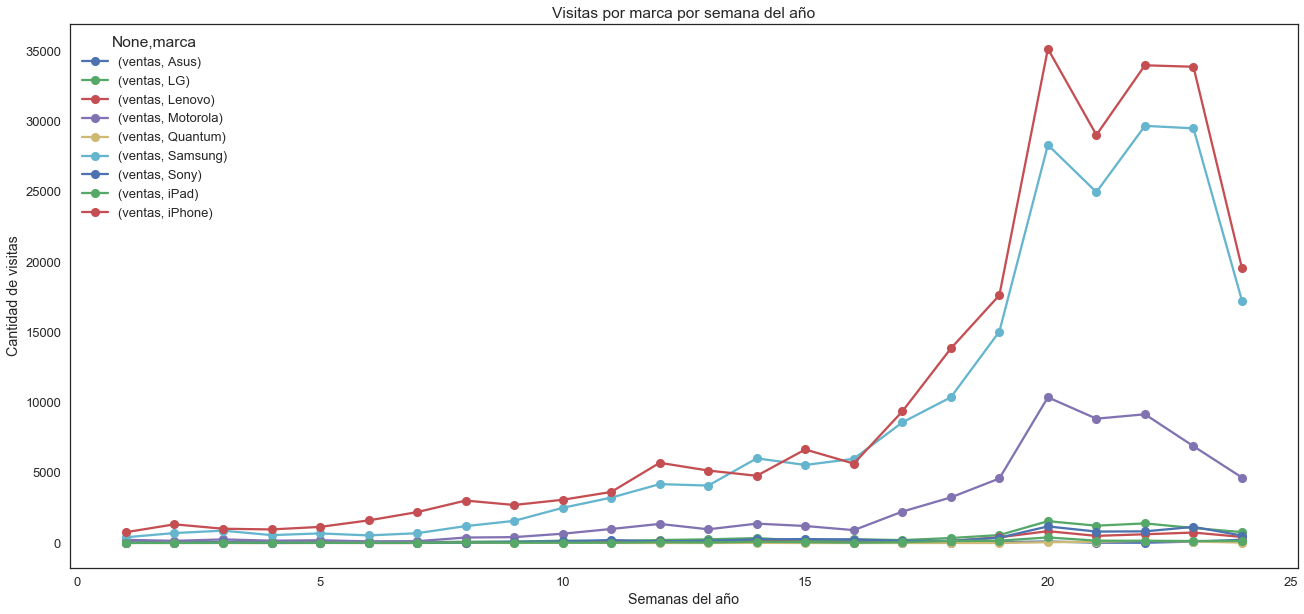

In [125]:
view = view.groupby('semana').marca.value_counts().to_frame('ventas')
graf = view.unstack('marca').fillna(0).plot(kind = 'line', figsize = (22, 10), style = '-o')
graf.set_xlabel('Semanas del año')
graf.set_ylabel('Cantidad de visitas')
graf.set_title('Visitas por marca por semana del año')

# Quiero ver las visitas por campaña

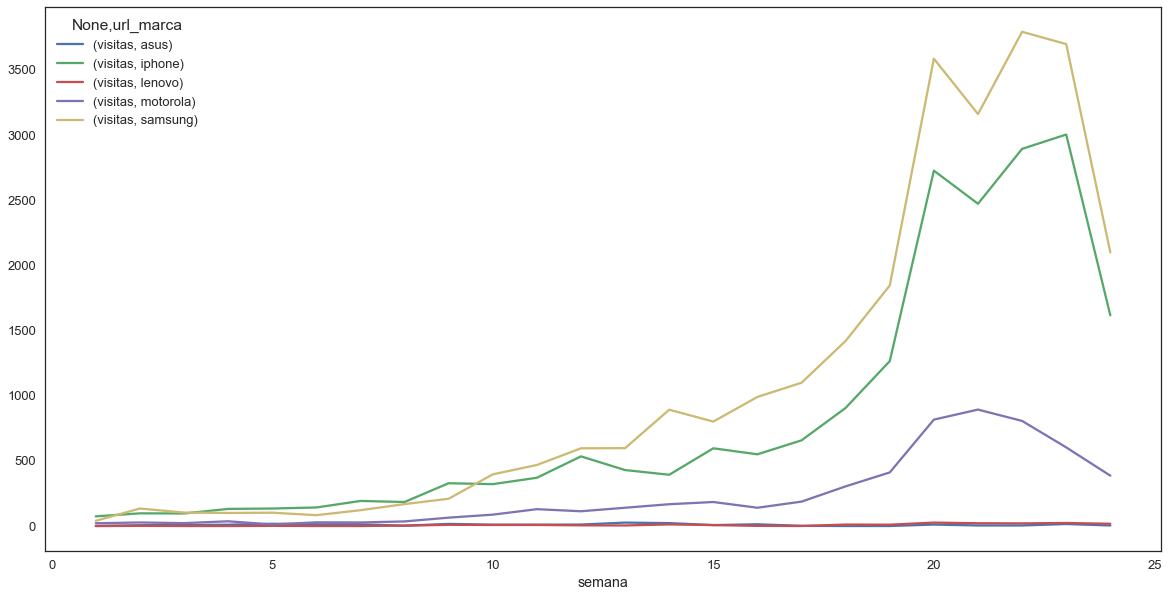

In [232]:
marcas = ['iphone', 'samsung', 'motorola', 'lenovo', 'asus']
def check_marca(x):
    lista = str(x).split("/")
    if len(lista) > 2:
        return lista[2]
    return "sin definir"

campaign = data[data['event'] == 'ad campaign hit']
campaign = campaign[campaign.url.notna()]
campaign['url_marca'] = campaign.url.apply(check_marca)
campaign = campaign[campaign.url_marca.isin(marcas)]
visitas = campaign.groupby('semana').url_marca.value_counts().to_frame('visitas').unstack('url_marca').fillna(0)
visitas.plot(kind = 'line', figsize = (20, 10), legend = True)

# Cantidad de compras por dia por marca por clicks en campaña 

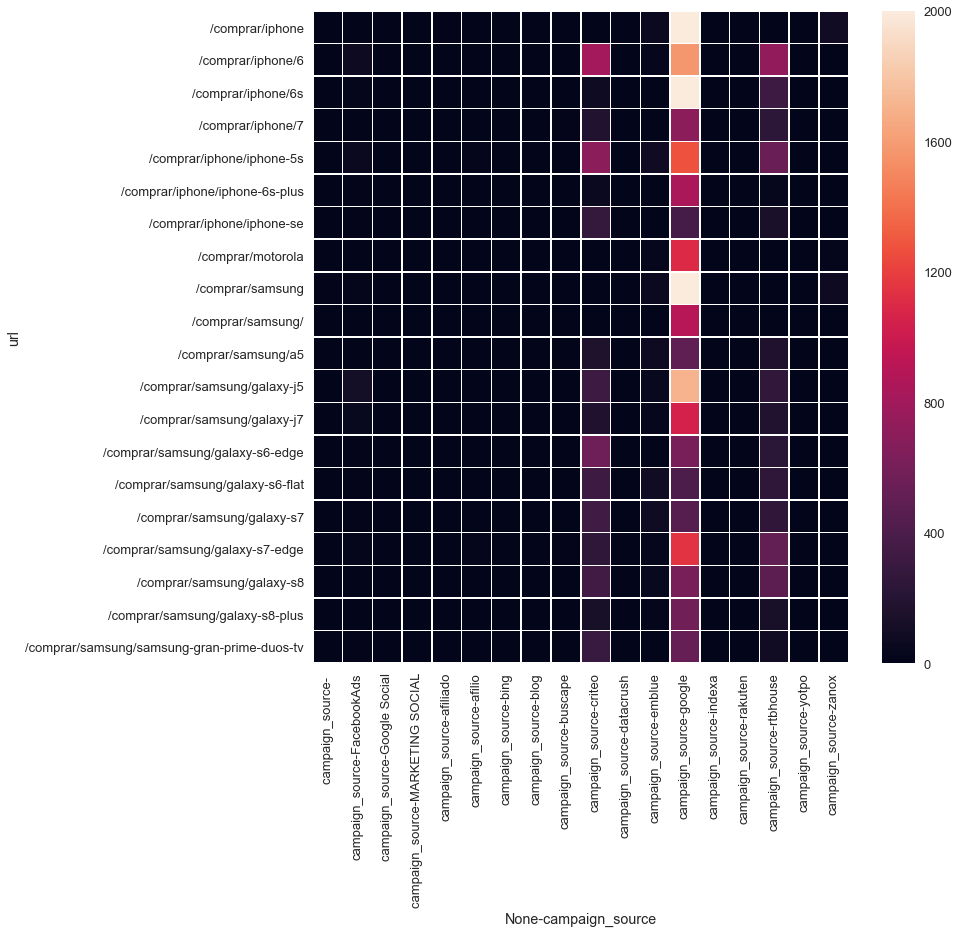

In [84]:
camp = data[data.event == 'ad campaign hit']
camp = camp.fillna(' ')
camp = camp[camp.url.str.contains('comprar')]
lista = camp.url.value_counts().to_frame('cantidad').head(20)
lista = lista.reset_index()['index'].tolist()
lista
camp = camp.groupby('url').campaign_source.value_counts().to_frame()
camp = camp.unstack('campaign_source').fillna(0).reset_index()

camp = camp[camp.url.isin(lista)]
camp = camp.set_index('url')
camp
plt.figure(figsize = (12, 12))
sns.heatmap(camp, linewidths=.5, vmin=0, vmax=2000)

In [83]:
# camp = data[data.event == 'ad campaign hit']
# camp.groupby('campaign_source').url.value_counts()

campaign_source  url                                                 
Facebook         /                                                         77
FacebookAds      /                                                        170
                 /comprar/samsung/galaxy-j5                               102
                 /comprar/iphone/6                                         66
                 /comprar/iphone/iphone-5s                                 51
                 /comprar/samsung/galaxy-j7                                42
                 /comprar/iphone/6s                                        21
                 /comprar/motorola/moto-g-2a-geracao                       21
                 /comprar/samsung                                          18
                 /comprar/iphone/6-plus                                    17
                 /comprar/samsung/galaxy-s5-mini-duos                      16
                 /comprar/samsung/galaxy-s7-edge                        